# YASWANTH AINAKOTA

# Grip March 2023 internship

# Task 3:- Exploratory Data Analysis - Retail

We will conduct "Exploratory Data Analysis" on the dataset "SampleSuperstore" for this assignment. As a manager of a company, we will look for the areas that need improvement so that we can increase our profits. Additionally, all company issues can be determined by data exploration.

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
sam_data = pd.read_csv(r'C:/Users/ainak.YASWANTH/Desktop/Dataset/SampleSuperstore.csv')
sam_data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
sam_data.shape

(9994, 13)

In [4]:
sam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
sam_data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [6]:
#checking for missing values
sam_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#Checking for duplicate values
sam_data.duplicated().sum()

17

*There are 17 duplicate values in the given data.*

In [8]:
#Droping those duplicate values
sam_data.drop_duplicates()

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9977 rows x 13 columns]

In [9]:
#Finding Unique values
sam_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

*We can the drop the "Postal Code" column as it is not as required in knowing the sales or marketing. We can consider region instead of pincode.*

In [10]:
# Deleting Postal Code column
col = ['Postal Code']
sam_data = sam_data.drop(columns=col,axis=1)
sam_data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category     Sales  Quantity  Discount    Profit  
0  South        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1  South        Furniture       Chairs  731.9400         3      0.00  219.5820  
2   West  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3  South        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  South  Office Supplies      Storage   22.3680         2      0.20    2.5164

# Correlation Grpah of attributes

<AxesSubplot: >

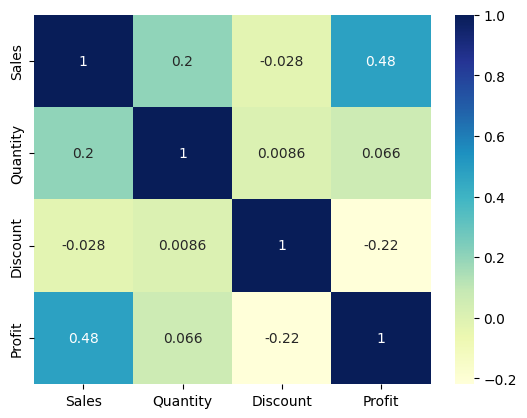

In [11]:
#Finding the Correlation between attributes
sns.heatmap(sam_data.corr(), cmap="YlGnBu", annot=True)

# Covariance Graph of attributes 

<AxesSubplot: >

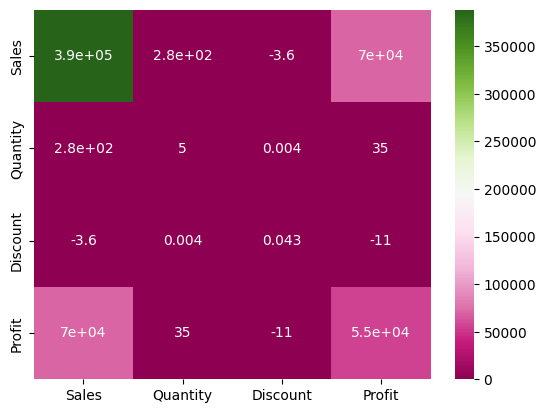

In [12]:
#Finding the Covariance between attributes
sns.heatmap(sam_data.cov(), cmap="PiYG", annot=True)

# Exploratory Data Analysis

# Data Visualisation

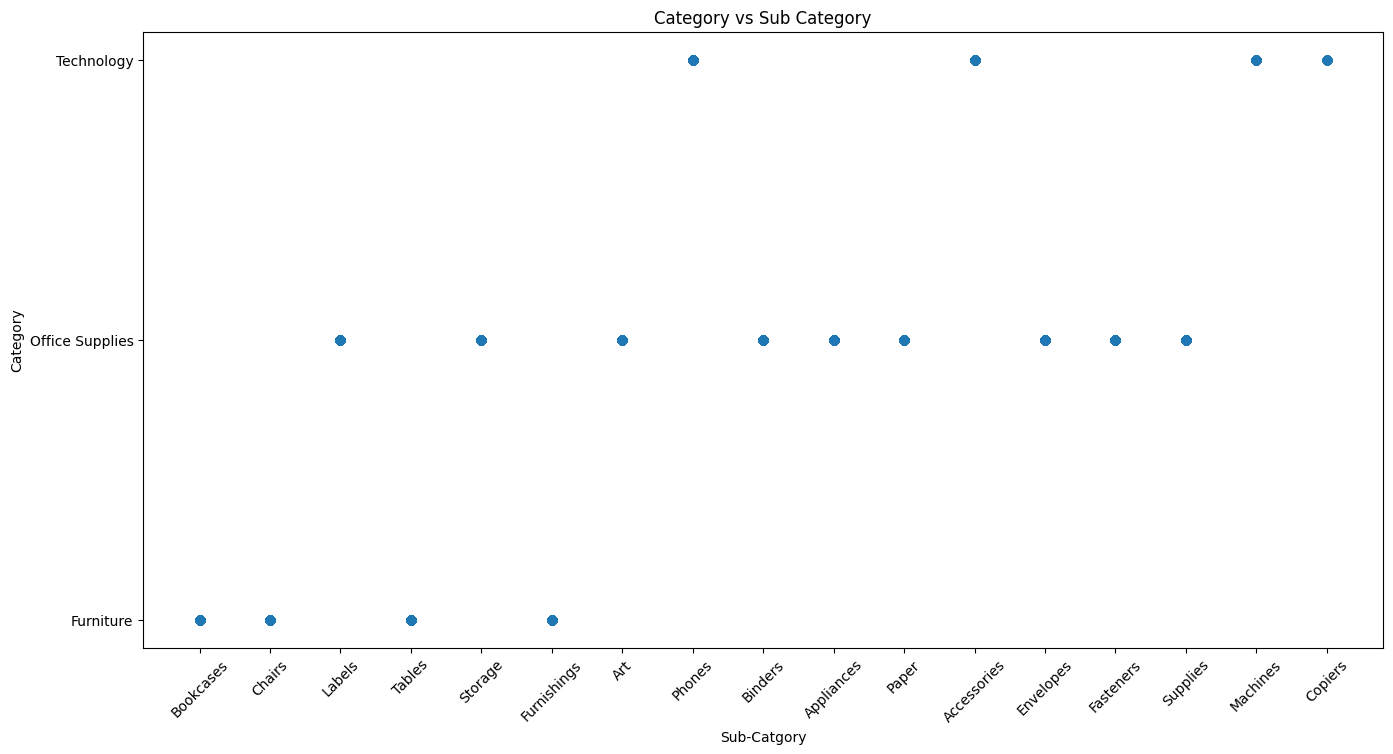

In [13]:
plt.figure(figsize=(16,8))
plt.scatter('Sub-Category','Category', data=sam_data)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

*The above plotted graph repesents the categories of items which are sold and the items which fall under the that particular category.*

array([[<AxesSubplot: title={'center': 'Sales'}>,
        <AxesSubplot: title={'center': 'Quantity'}>],
       [<AxesSubplot: title={'center': 'Discount'}>,
        <AxesSubplot: title={'center': 'Profit'}>]], dtype=object)

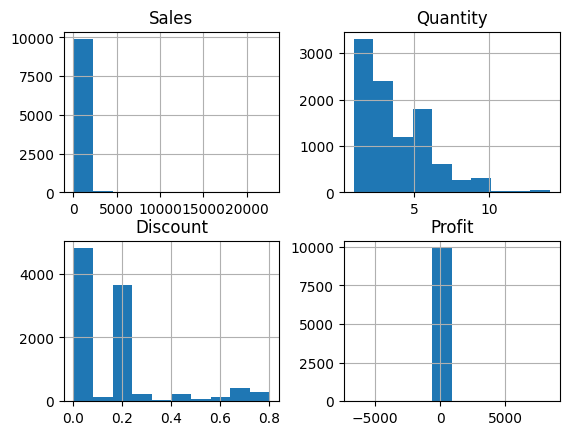

In [14]:
sam_data.hist()

*From the above Graph it can be interpreted that the given data is not normally distributed*

In [15]:
# States present the number of times repeated
sam_data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

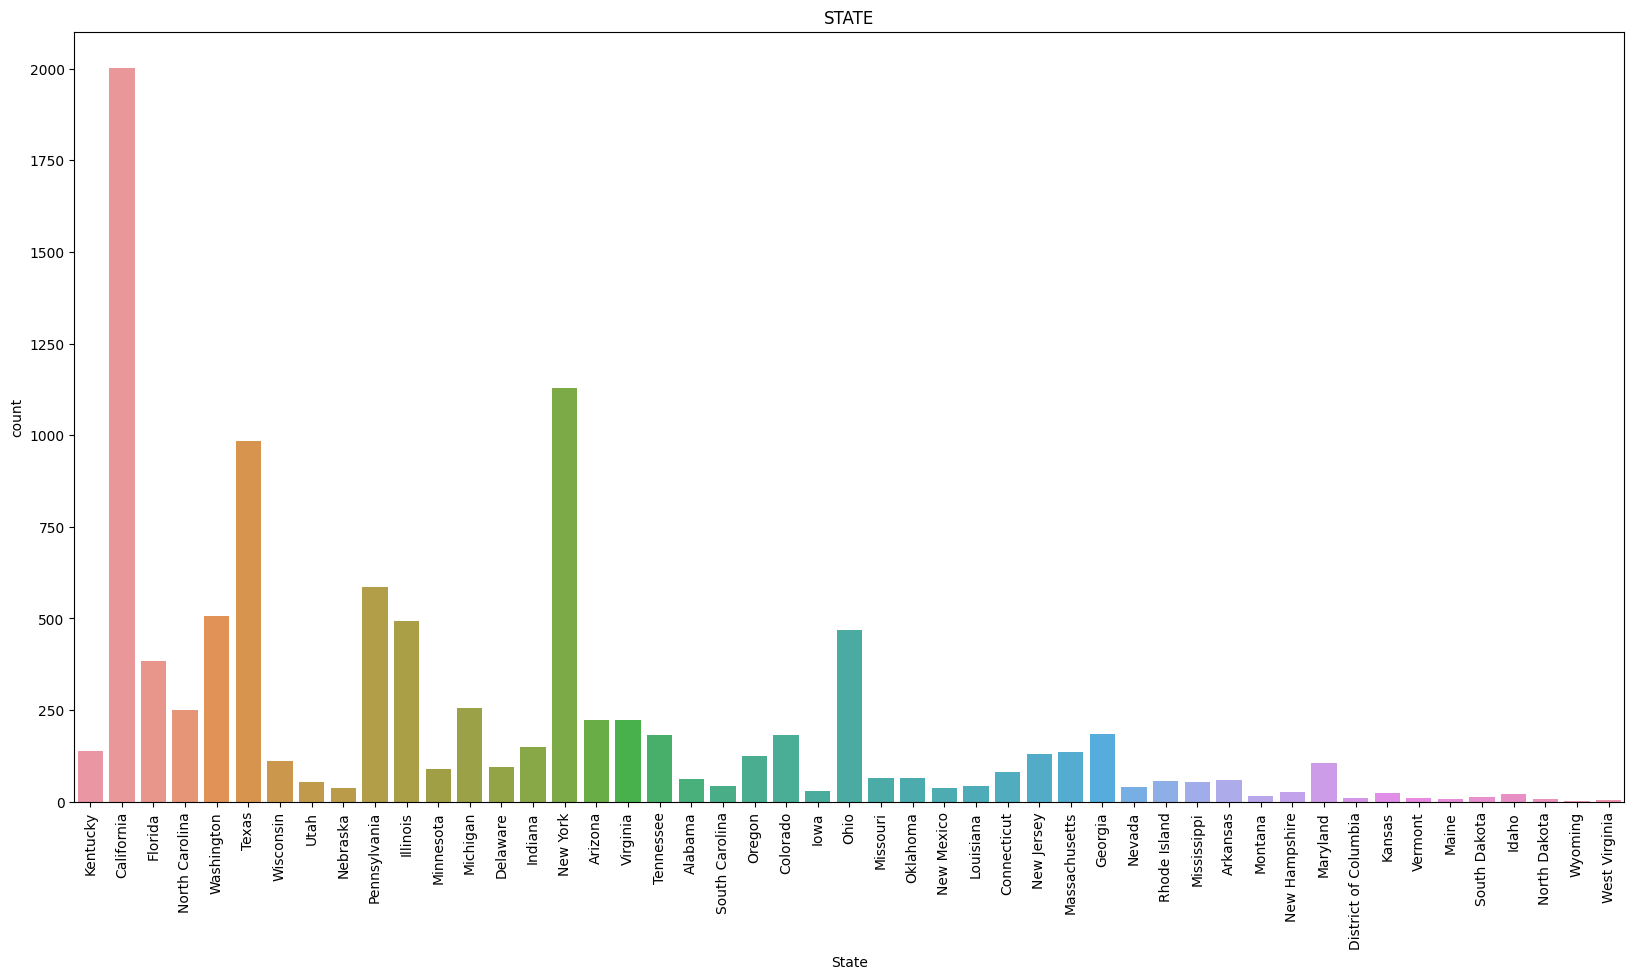

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x = sam_data['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

The above graph is a countplot which represents the count of the times a state has been repeated.

It can be seen that the state of California has the highest number of mentions with 2001, followed by the state of Newyork with 1128, and the third highest mentioned state is of Texas with 985.

There are 5 states with mentions above 300 and under 600. There can be observed 14 states with mentions below 300 and above 100 and rest of the states have be repeated less than 100 times.

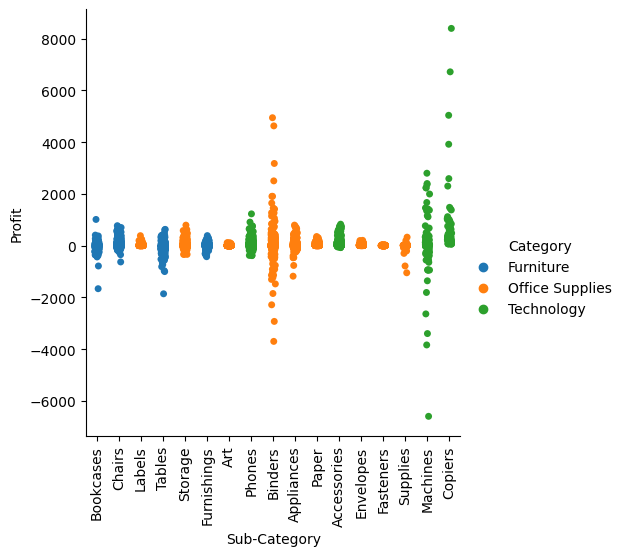

In [17]:
sns.catplot(data=sam_data, x="Sub-Category", y="Profit", hue="Category")
plt.xticks(rotation=90)
plt.show()

The profit and loss for each and every subcategory are displayed in the graph above. Here, we can see from the graph that, out of all the sub-categories, the "Blinders" sub-category has experienced the highest loss and profit.

The Subcategory of "Copiers" has had the biggest profit with no loss. Some subcategories have also experienced no losses at all, but their profit margins have not increased.

Highes loss is observed with 'Machines'.

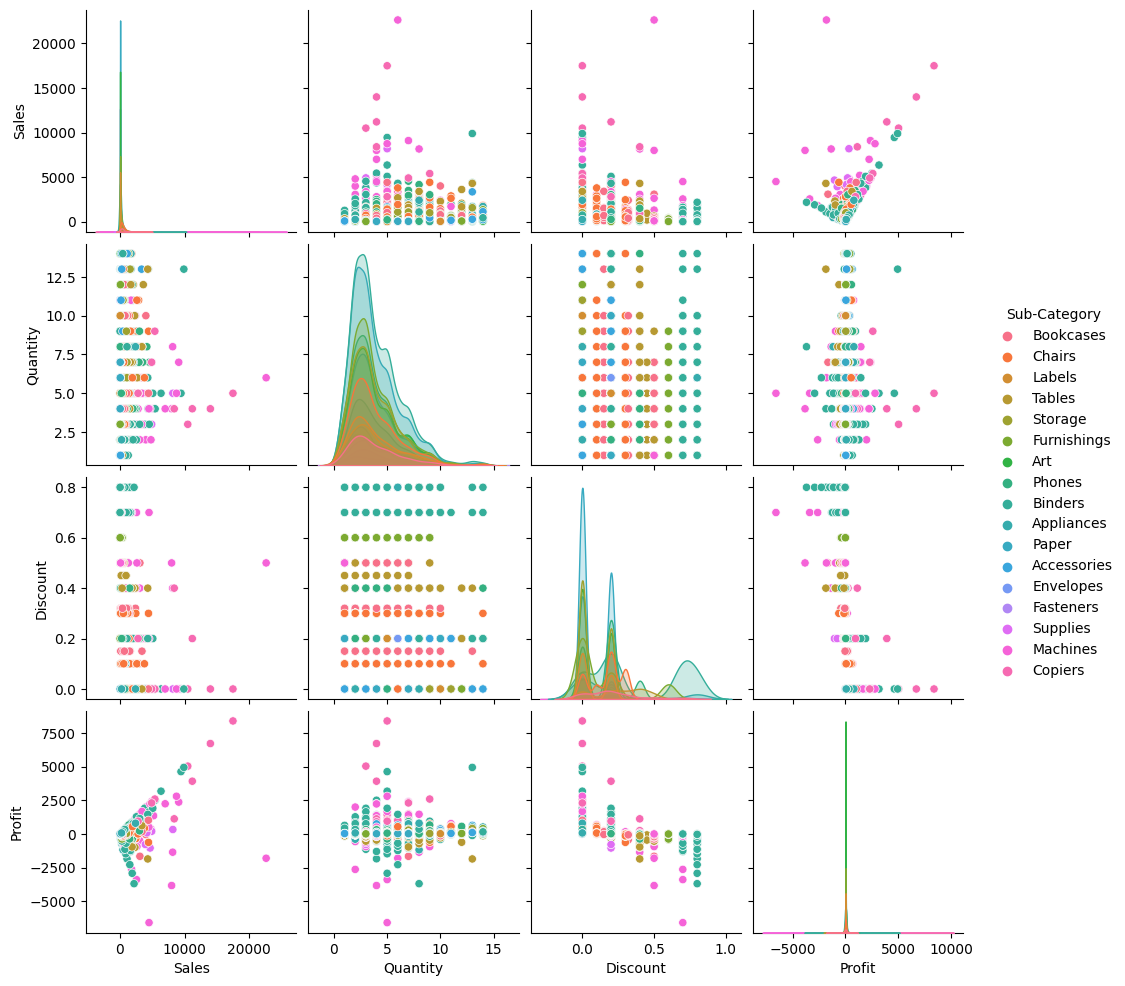

In [18]:
figsize=(15,15)
sns.pairplot(sam_data,hue='Sub-Category')

We can conclude from the above plot that the Data is not Normal and contains some Outliers.

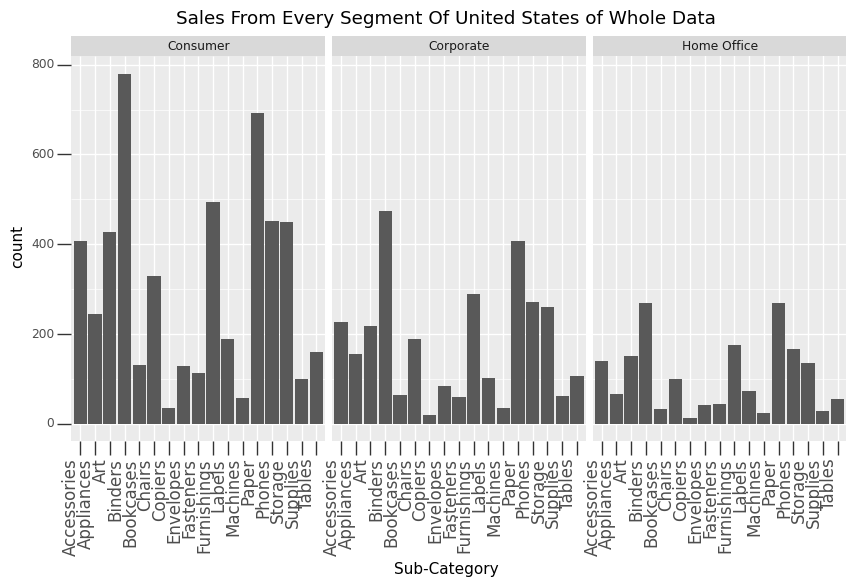

<ggplot: (144685854483)>

In [19]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sam_data, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

According to the graph above, the "Home Office" section has fewer Sub-Categories that are purchased, and the lowest sales are in the "Tables," "Supplies," "Machines," "Copiers," and "Bookcases" categories. Compared to other segments, "Consumer" has bought more sub-categories.

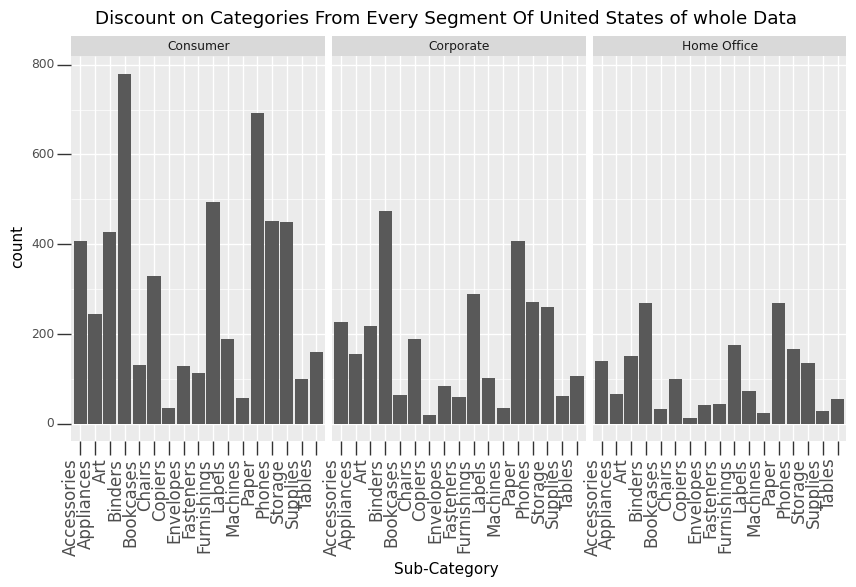

<ggplot: (144684785397)>

In [20]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sam_data, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of whole Data"))

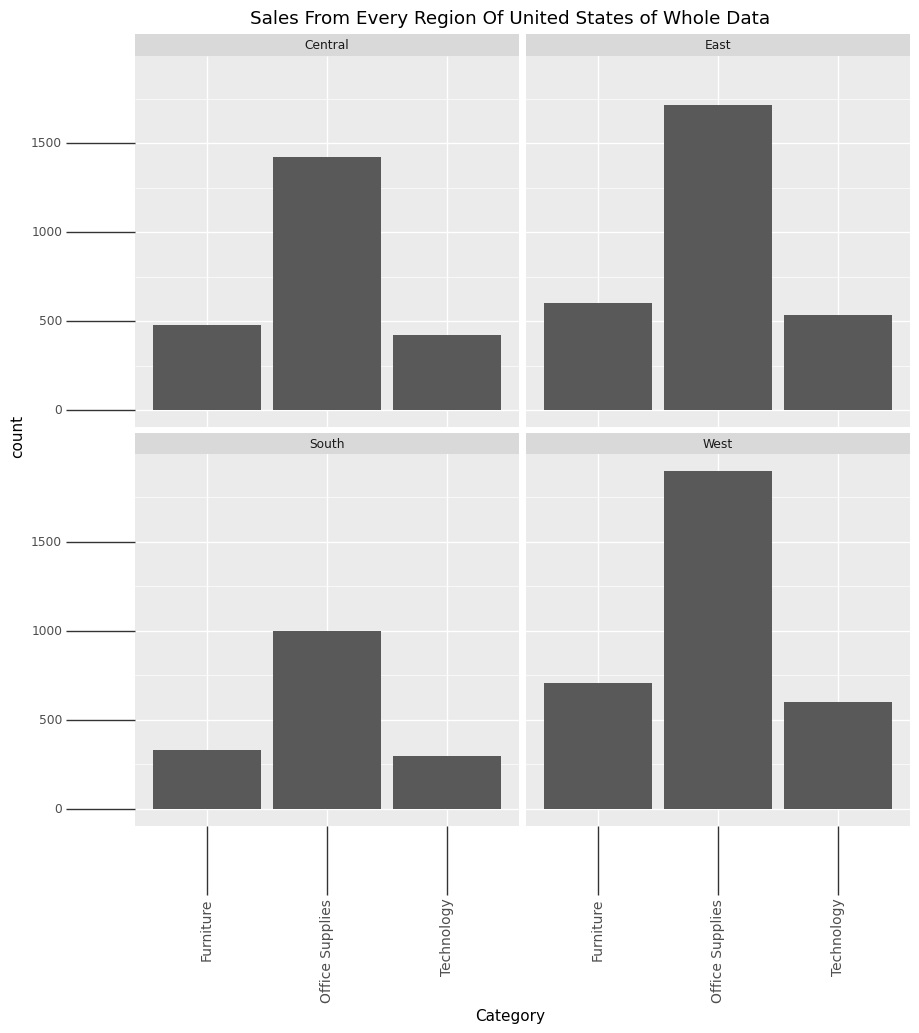

<ggplot: (144685872363)>

In [21]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sam_data, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

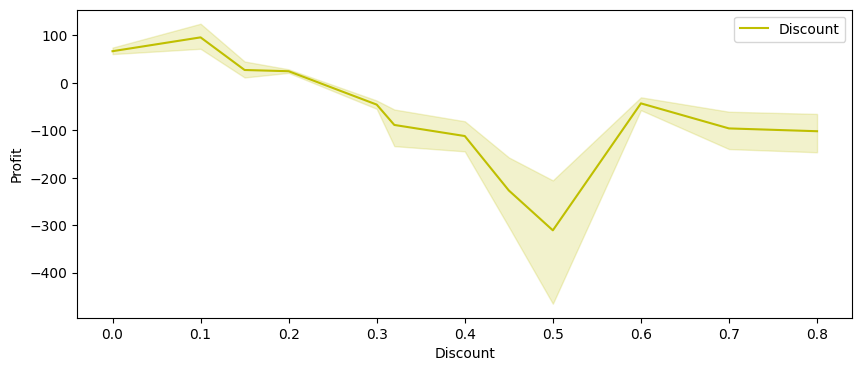

In [22]:
plt.figure(figsize=(10,4))
sns.lineplot(x= 'Discount',y='Profit', data = sam_data , color='y',label='Discount')
plt.legend()

It can be observed that the profit is decreasing as the discount is being increased. The profit is at it's lowest when the disount is at 0.5 i.e. at 50%.

The profit decreased as the discount increased till 50 percent discount ratio. It is also noted that there is a sharp rise in the profit for the discount percentages above 50 percent.

In [23]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
sam_data['state_code'] = sam_data.State.apply(lambda x: state_code[x])

In [25]:
state_data = sam_data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()
fig = go.Figure(data=go.Choropleth(locations=state_data.index, z = state_data.Sales, locationmode = 'USA-states', colorscale = 'Reds',colorbar_title = 'Sales in USD',))
fig.update_layout(title_text = 'Total State-Wise Sales',geo_scope='usa',height=800,)

Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.

We have a few questions to answer here.
    
    1.What products do the most profit making states buy?
    2.What products do the loss bearing states buy?
    3.What product segment needs to be improved in order to drive the profits higher?

In [26]:
def state_data_viewer(states):
    product_data = sam_data.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1

Plots the turnover generated by different product categories and sub-categories for the list of given states.

    Args:
        states- List of all the states you want the plots for
        
    Returns:
        None

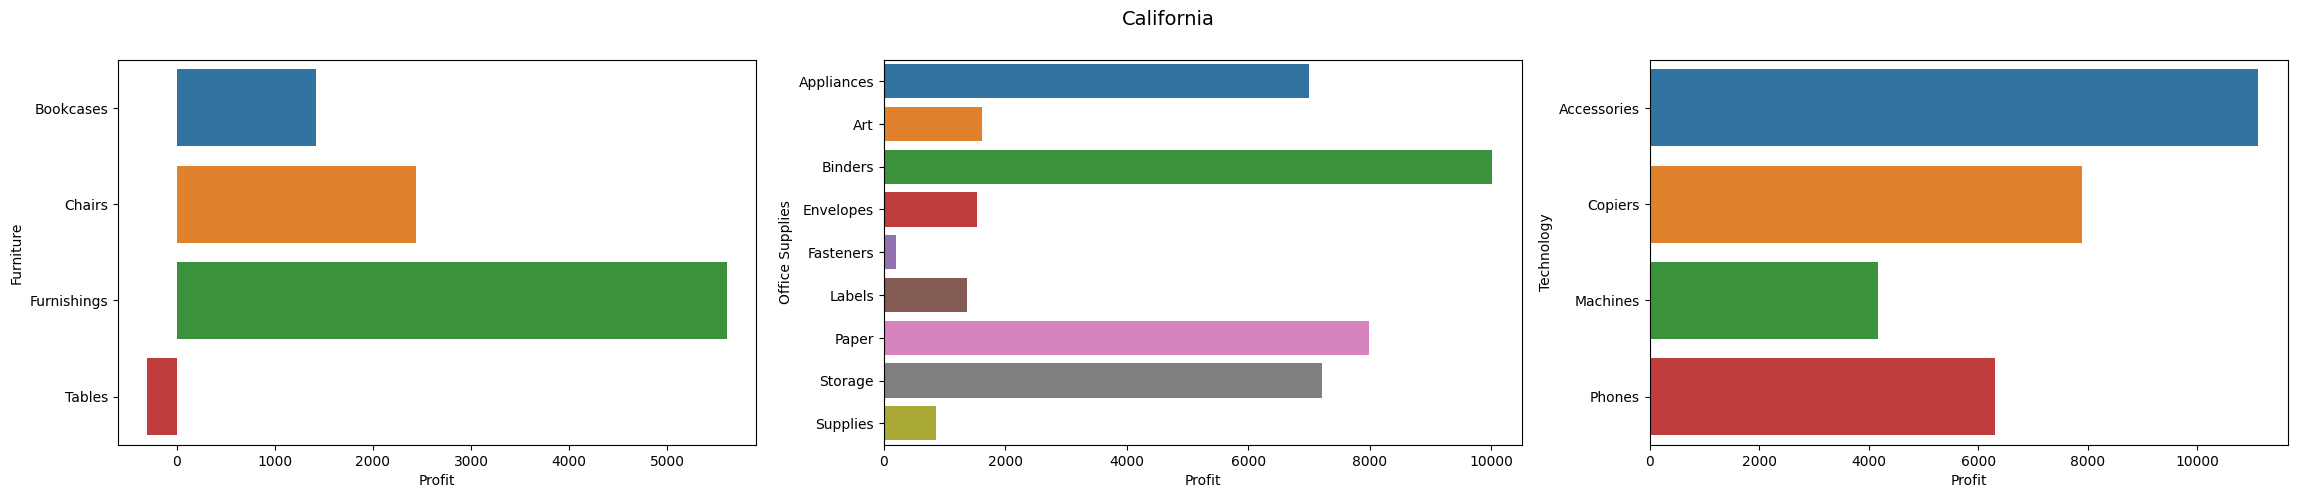

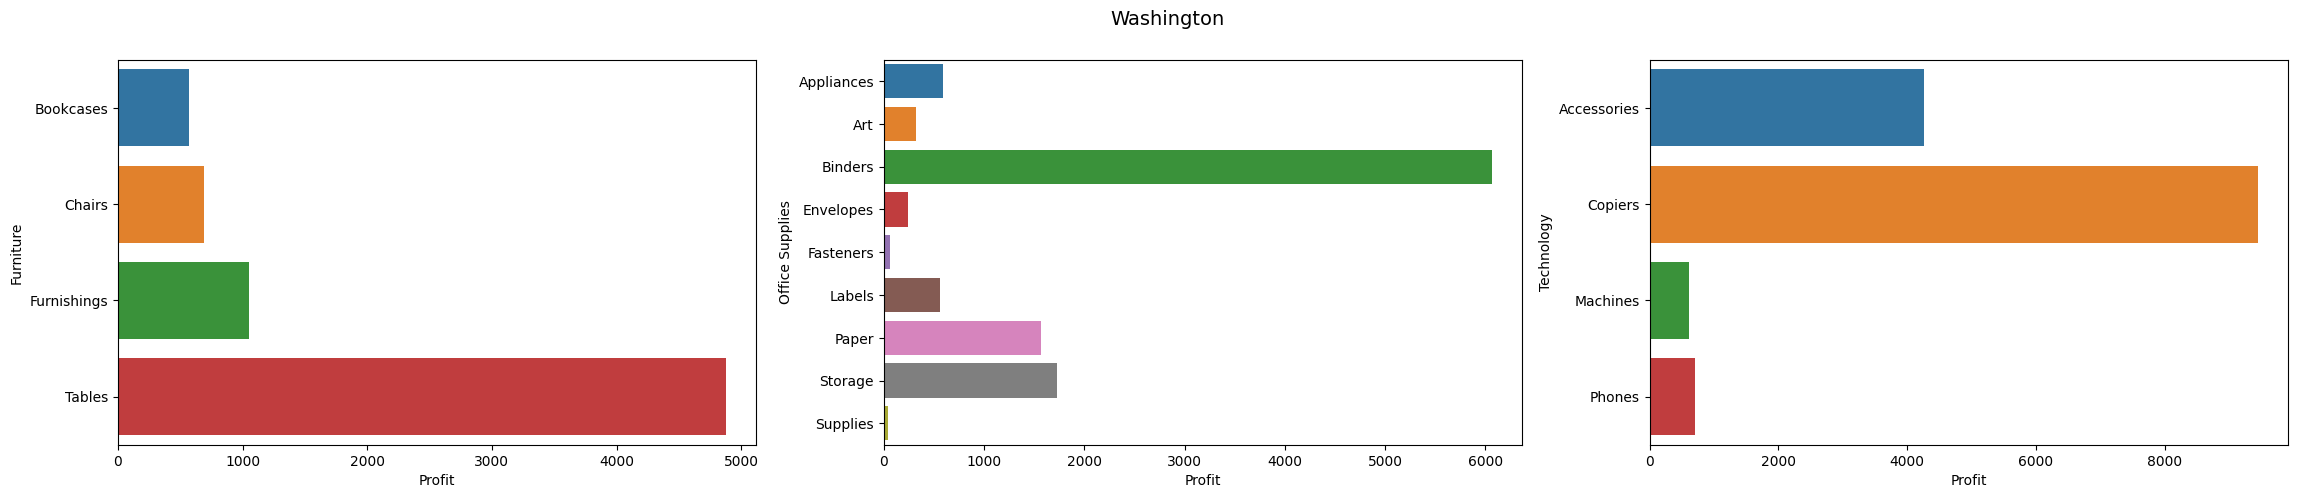

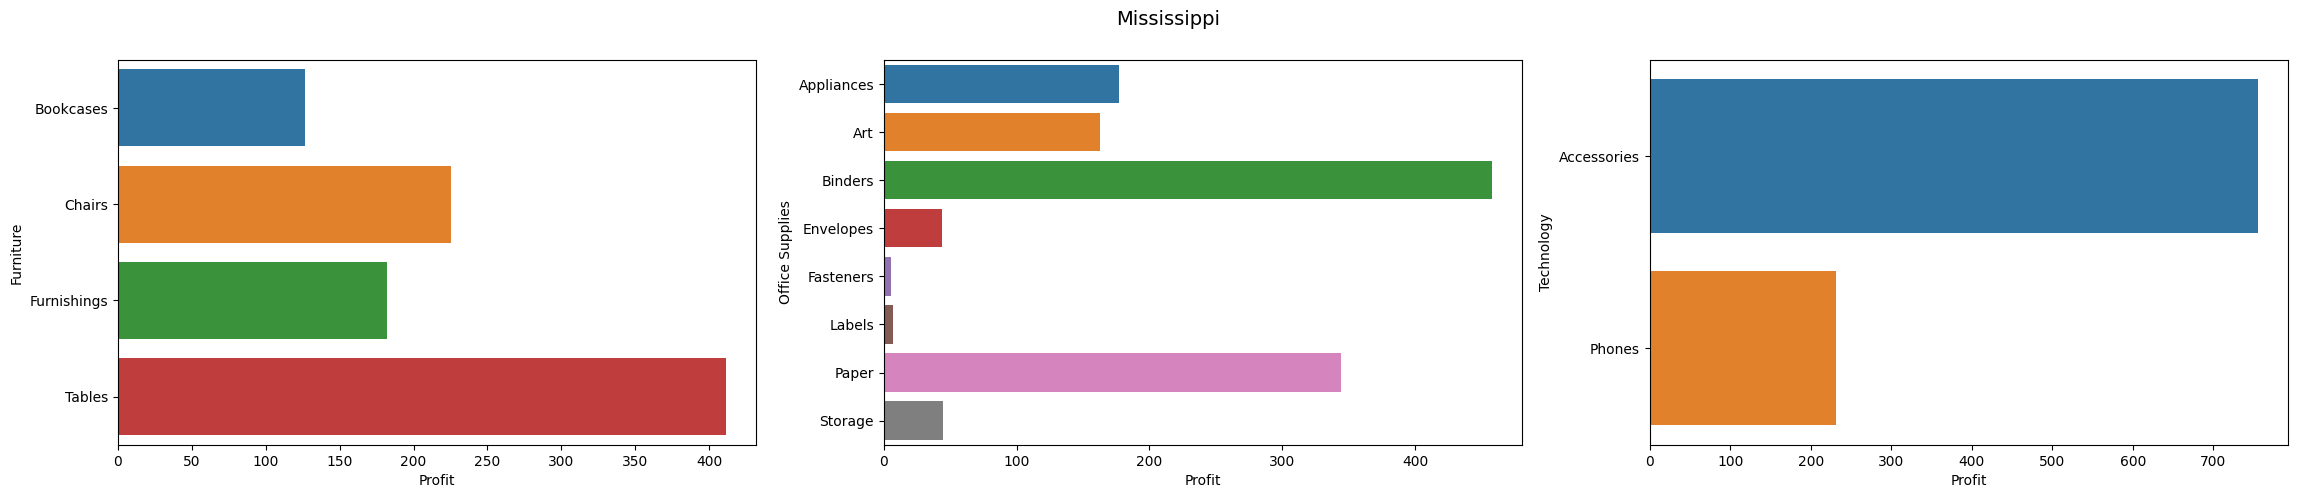

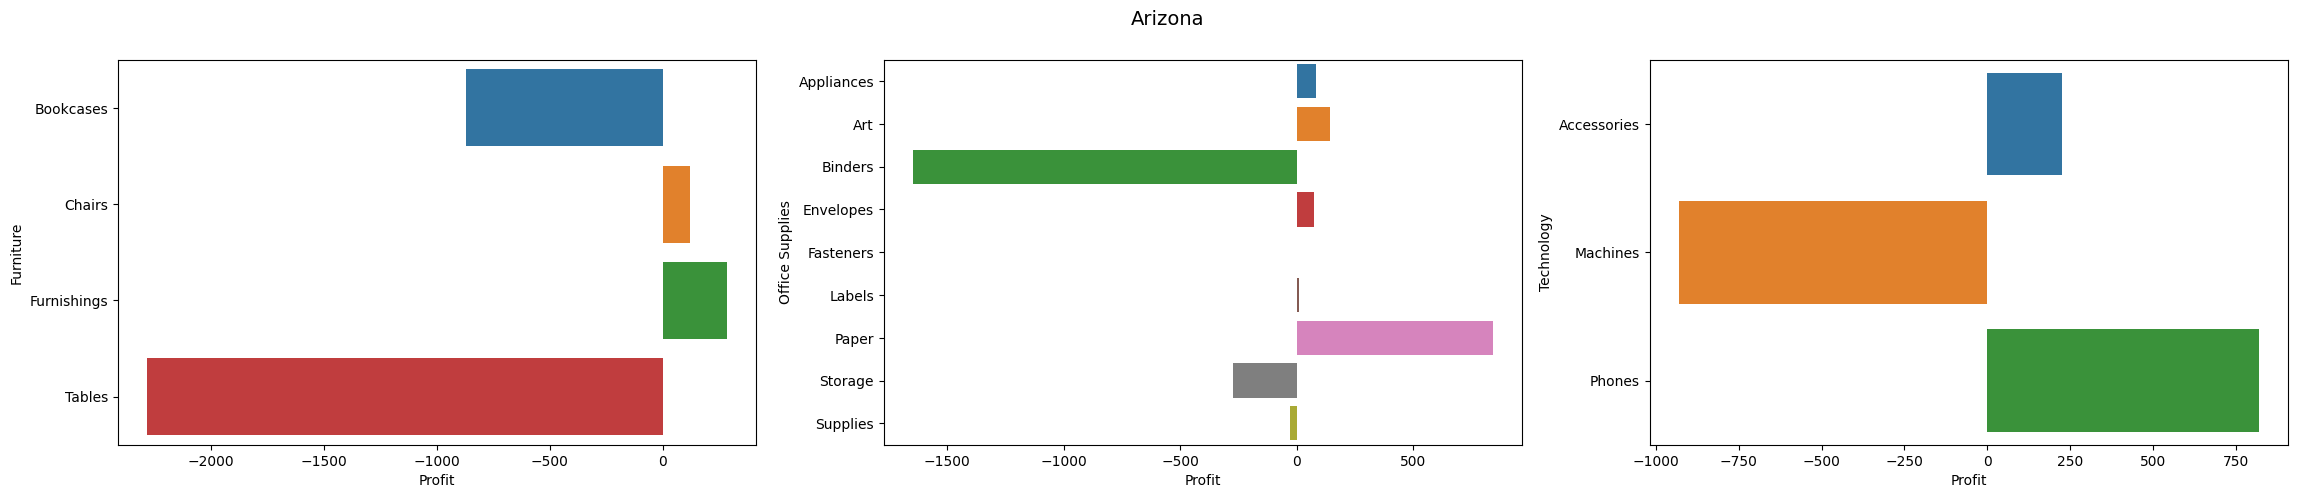

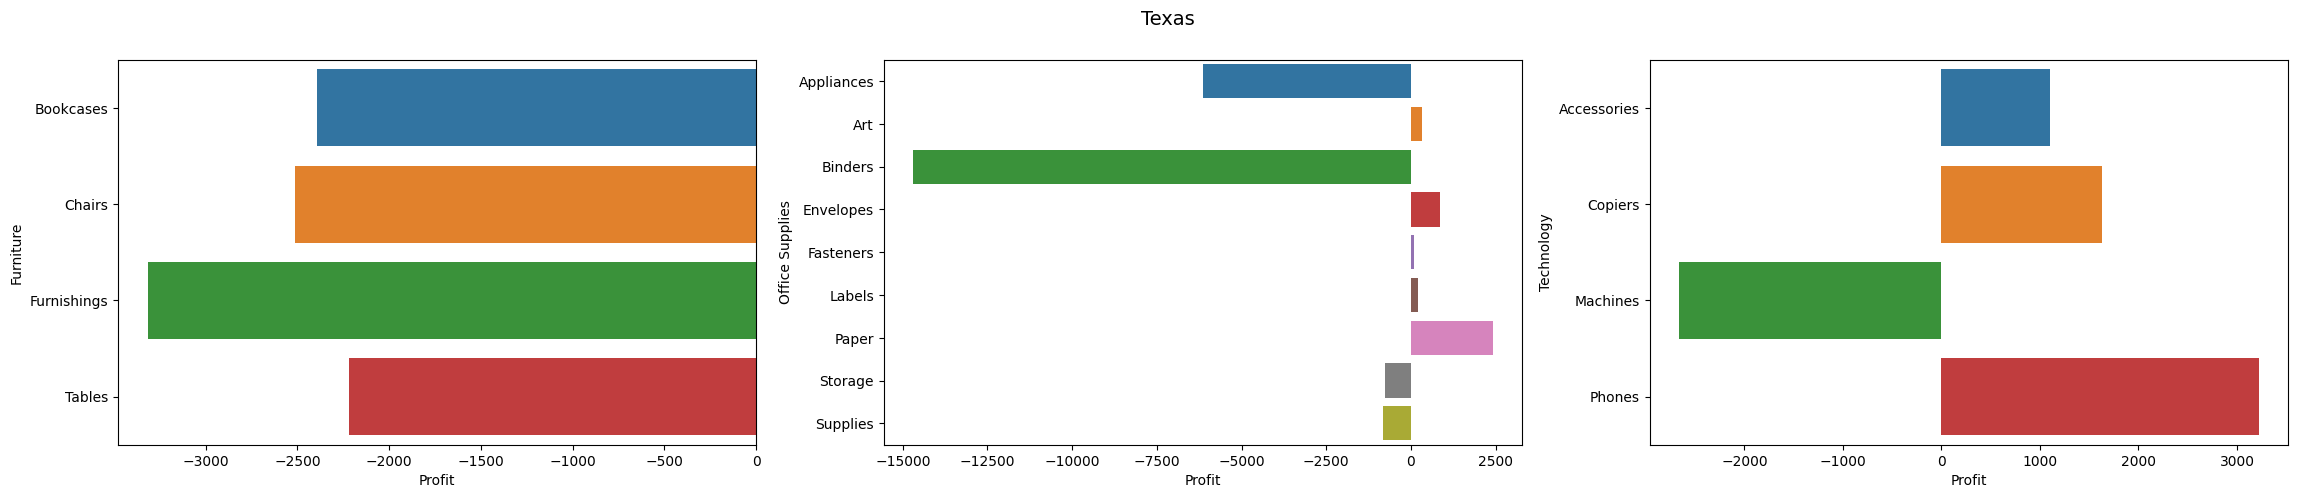

In [27]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

We can see the states and categories with high or low sales and earnings from the data visualisation above. By offering discounts in a preferred range, we may make improvements in those states and increase both our profits and those of our customers. The superstore in this instance is losing money by offering discounts on its products, but it can't stop. In order for the shop to make room in their warehouses for new inventory, the majority of the steep discounts occur during holidays, end-of-season, and clearance sales. Also, by suffering little losses now, the business benefits later on by gaining more devoted clients. As a result, the modest losses from discounts constitute a crucial component of the company's operations.

# Thank You 